In [ ]:
import pandas as pd
import matplotlib as plt 
import seaborn as sns

data = pd.read_csv("C:/Users/MERRY DON PAULSON/Desktop/SEM 6/ML/lab/student_sleep.csv")

print(data.head())
print(data.info())


   Student_ID  Age Gender University_Year  Sleep_Duration  Study_Hours  \
0           1   24  Other        2nd Year             7.7          7.9   
1           2   21   Male        1st Year             6.3          6.0   
2           3   22   Male        4th Year             5.1          6.7   
3           4   24  Other        4th Year             6.3          8.6   
4           5   20   Male        4th Year             4.7          2.7   

   Screen_Time  Caffeine_Intake  Physical_Activity  Sleep_Quality  \
0          3.4              2.0               37.0           10.0   
1          1.9              5.0               74.0            2.0   
2          3.9              5.0                NaN            5.0   
3          2.8              4.0               55.0            9.0   
4          2.7              0.0               85.0            3.0   

   Weekday_Sleep_Start  Weekend_Sleep_Start  Weekday_Sleep_End  \
0                14.16                 4.05               7.41   
1       

In [1]:
print ("Missing values before handling - ")
data.isnull().sum()

Missing values before handling - 


NameError: name 'data' is not defined

In [ ]:
data.fillna(data.mean(numeric_only=True), inplace= True)
categorical_columns = data.select_dtypes(include=['object']).columns
for col in categorical_columns:
    data[col].fillna(data[col].mode()[0], inplace=True)

print("\nMissing values after handling - ")
print(data.isnull().sum)



Missing values after handling - 
<bound method NDFrame._add_numeric_operations.<locals>.sum of      Student_ID    Age  Gender  University_Year  Sleep_Duration  Study_Hours  \
0         False  False   False            False           False        False   
1         False  False   False            False           False        False   
2         False  False   False            False           False        False   
3         False  False   False            False           False        False   
4         False  False   False            False           False        False   
..          ...    ...     ...              ...             ...          ...   
495       False  False   False            False           False        False   
496       False  False   False            False           False        False   
497       False  False   False            False           False        False   
498       False  False   False            False           False        False   
499       False  False  

<function matplotlib.pyplot.show(close=None, block=None)>

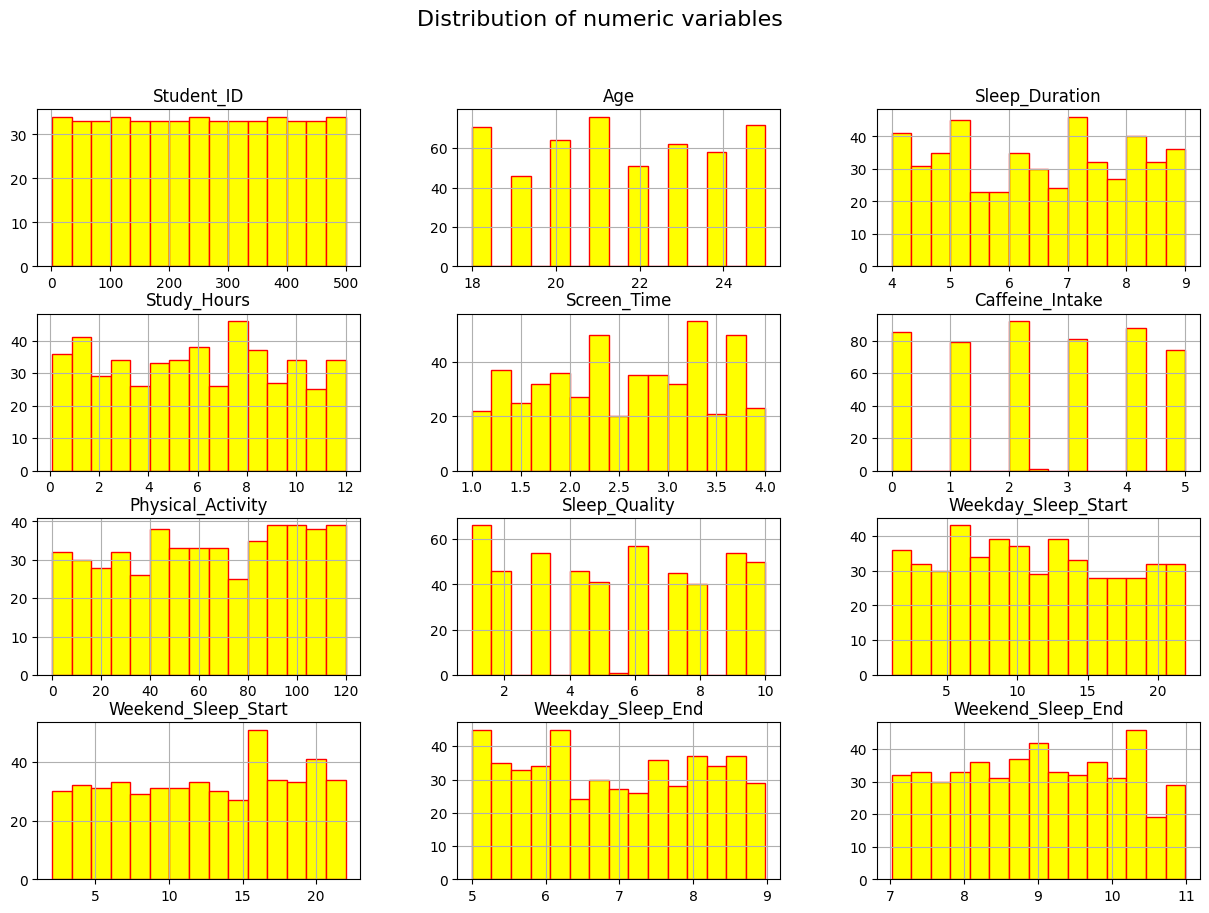

In [14]:
numeric_columns = data.select_dtypes(include=["float64",'int64']).columns
data[numeric_columns].hist(bins=15, figsize=(15,10),color='yellow', edgecolor='red')
plt.suptitle('Distribution of numeric variables', fontsize=16)
plt.show

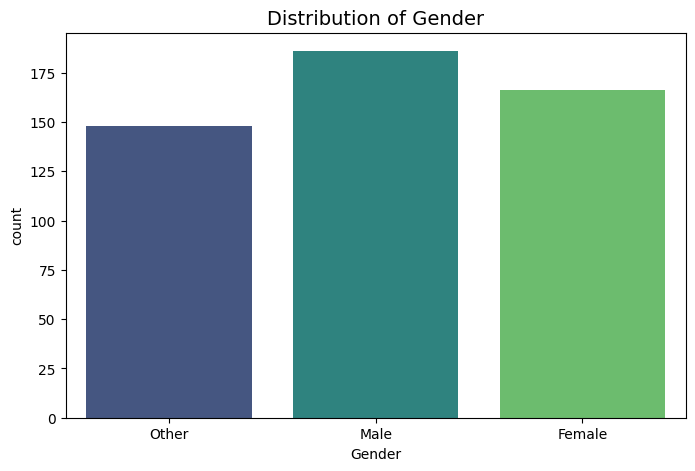

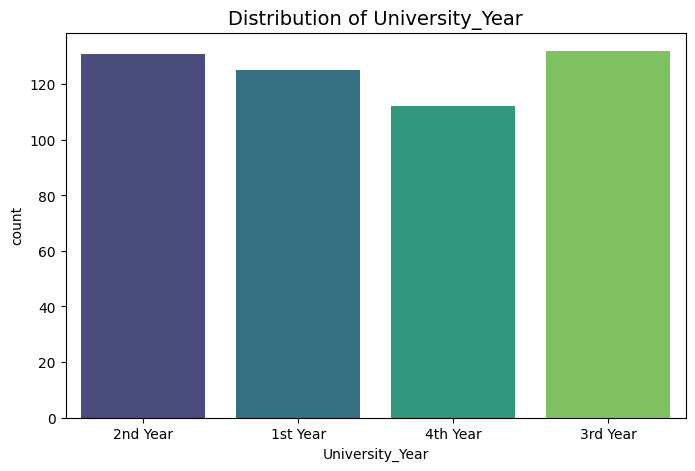

In [17]:
categorical_columns = data.select_dtypes(include=['object']).columns
for col in categorical_columns:
    plt.figure(figsize=(8,5))
    sns.countplot(data=data, x=col,palette='viridis')
    plt.title(f"Distribution of {col}", fontsize=14)
    plt.show()

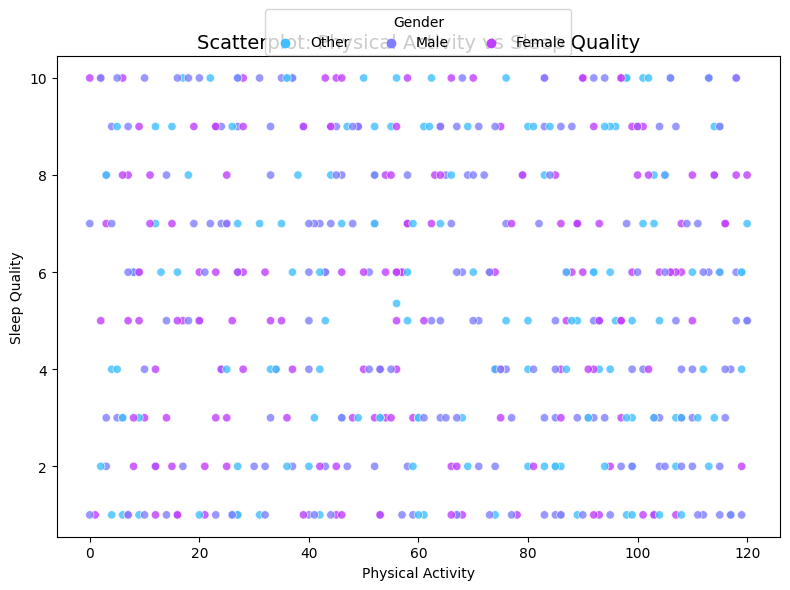

In [24]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='Physical_Activity', y='Sleep_Quality', hue='Gender', palette='cool', alpha=0.8)
plt.title("Scatterplot: Physical Activity vs Sleep Quality", fontsize=14)
plt.xlabel("Physical Activity")
plt.ylabel("Sleep Quality")
plt.legend(title='Gender', bbox_to_anchor=(0.5, 1.05), loc='center', ncol=3)  # Legend at the top
plt.tight_layout()
plt.show()


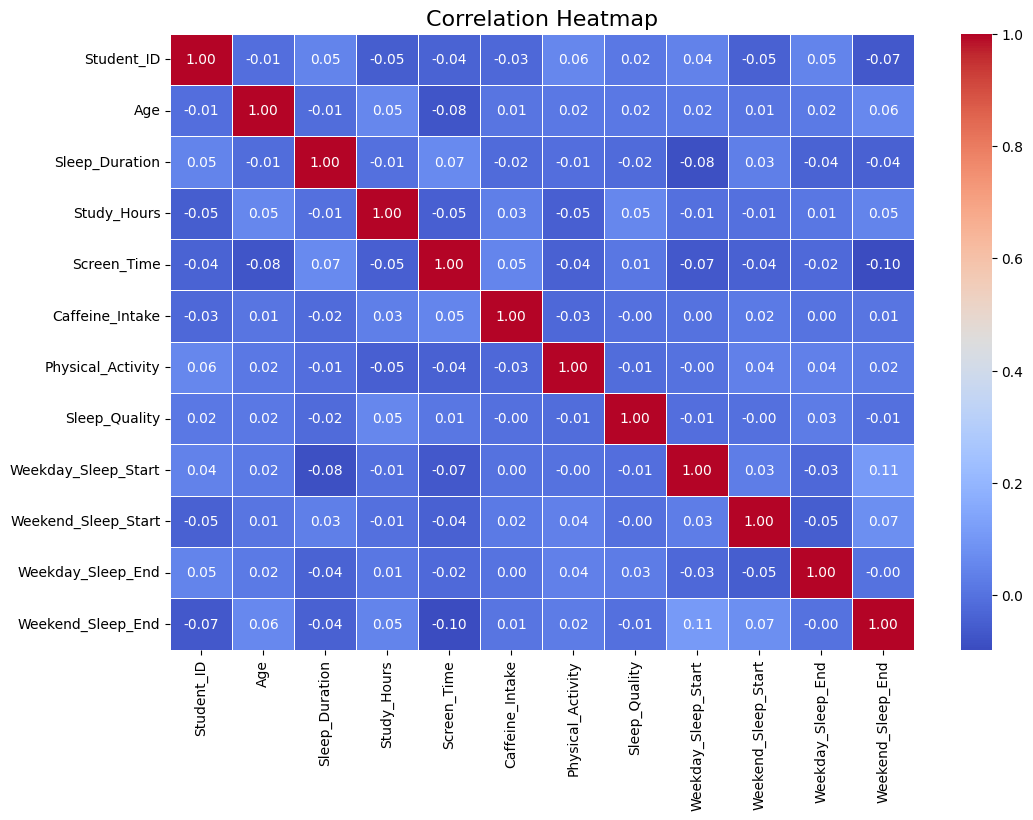

In [ ]:
plt.figure(figsize=(12, 8)) correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap", fontsize=16)
plt.show()

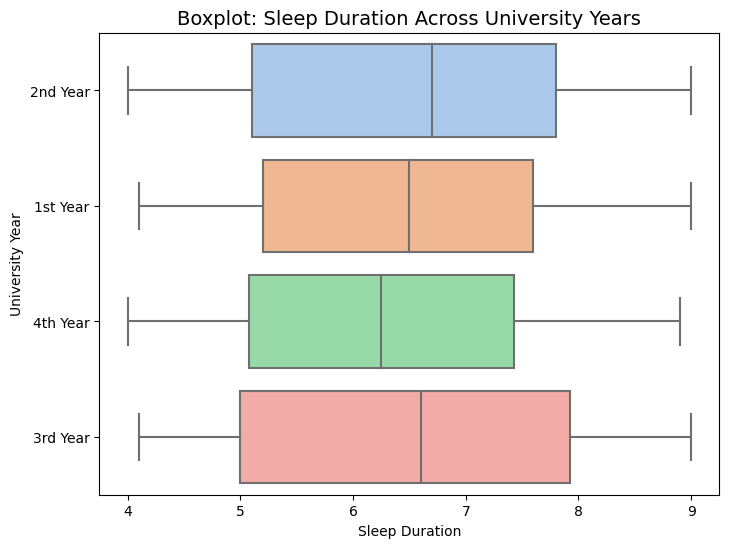

In [27]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=data, y='University_Year', x='Sleep_Duration', palette='pastel', orient='h')
plt.title("Boxplot: Sleep Duration Across University Years", fontsize=14)
plt.ylabel("University Year")
plt.xlabel("Sleep Duration")
plt.show()


In [7]:
from sklearn.preprocessing import LabelEncoder
import category_encoders as ce
import pandas as pd

data = pd.read_csv("C:/Users/MERRY DON PAULSON/Desktop/SEM 6/ML/lab/student_sleep.csv")
data_selected = data[["Gender","University_Year"]]

one_hot_encoded= pd.get_dummies(data_selected,columns=['Gender','University_Year'], prefix=['Gender', 'University_Year'])
one_hot_encoded.head()

,Gender_Female,Gender_Male,Gender_Other,University_Year_1st Year,University_Year_2nd Year,University_Year_3rd Year,University_Year_4th Year
0,0,0,1,0,1,0,0
1,0,1,0,1,0,0,0
2,0,1,0,0,0,0,1
3,0,0,1,0,0,0,1
4,0,1,0,0,0,0,1


In [8]:
label_encoder_gender= LabelEncoder()
label_encoder_university= LabelEncoder()

label_encoded=data_selected.copy()
label_encoded['Gender']= label_encoder_gender.fit_transform(label_encoded['Gender'])
label_encoded['University_Year']= label_encoder_university.fit_transform(label_encoded['University_Year'])

label_encoded.head()

,Gender,University_Year
0,2,1
1,1,0
2,1,3
3,2,3
4,1,3


In [9]:
binary_encoder = ce.BinaryEncoder(cols=['Gender', 'University_Year'])
binary_encoded = binary_encoder.fit_transform(data_selected)

binary_encoded.head()

,Gender_0,Gender_1,University_Year_0,University_Year_1,University_Year_2
0,0,1,0,0,1
1,1,0,0,1,0
2,1,0,0,1,1
3,0,1,0,1,1
4,1,0,0,1,1
